In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-dataset/CAT_03/00000811_011.jpg.cat
/kaggle/input/cat-dataset/CAT_03/00000806_008.jpg
/kaggle/input/cat-dataset/CAT_03/00000886_026.jpg.cat
/kaggle/input/cat-dataset/CAT_03/00000845_017.jpg
/kaggle/input/cat-dataset/CAT_03/00000873_028.jpg
/kaggle/input/cat-dataset/CAT_03/00000894_008.jpg.cat
/kaggle/input/cat-dataset/CAT_03/00000820_002.jpg.cat
/kaggle/input/cat-dataset/CAT_03/00000867_010.jpg.cat
/kaggle/input/cat-dataset/CAT_03/00000832_024.jpg.cat
/kaggle/input/cat-dataset/CAT_03/00000872_015.jpg.cat
/kaggle/input/cat-dataset/CAT_03/00000810_028.jpg.cat
/kaggle/input/cat-dataset/CAT_03/00000850_027.jpg.cat
/kaggle/input/cat-dataset/CAT_03/00000893_026.jpg.cat
/kaggle/input/cat-dataset/CAT_03/00000887_028.jpg
/kaggle/input/cat-dataset/CAT_03/00000817_006.jpg
/kaggle/input/cat-dataset/CAT_03/00000889_002.jpg
/kaggle/input/cat-dataset/CAT_03/00000877_022.jpg
/kaggle/input/cat-dataset/CAT_03/00000855_010.jpg
/kaggle/input/cat-dataset/CAT_03/00000827_025.jpg.cat
/kaggl

In [2]:
!ls -al /kaggle/input

total 8
drwxr-xr-x  3 root   root    4096 Dec 27 07:24 .
drwxr-xr-x  6 root   root    4096 Dec 27 07:24 ..
drwxr-xr-x 10 nobody nogroup    0 Dec 23 14:29 cat-dataset


In [3]:
!tree -d /kaggle/input

/kaggle/input
└── cat-dataset
    ├── CAT_00
    ├── CAT_01
    ├── CAT_02
    ├── CAT_03
    ├── CAT_04
    ├── CAT_05
    ├── CAT_06
    └── cats
        ├── CAT_00
        ├── CAT_01
        ├── CAT_02
        ├── CAT_03
        ├── CAT_04
        ├── CAT_05
        └── CAT_06

16 directories


In [4]:
!cat /kaggle/input/cat-dataset/CAT_03/00000811_011.jpg.cat

9 239 95 287 85 273 128 200 71 185 21 225 40 277 29 305 -7 309 49 

In [5]:
!cat /kaggle/input/cat-dataset/cats/CAT_03/00000811_011.jpg.cat

9 239 95 287 85 273 128 200 71 185 21 225 40 277 29 305 -7 309 49 

In [6]:
import glob
file_list = glob.glob('/kaggle/input/cat-dataset/CAT_03/*.jpg')

print(len(file_list))
print(file_list[:5])

811
['/kaggle/input/cat-dataset/CAT_03/00000806_008.jpg', '/kaggle/input/cat-dataset/CAT_03/00000845_017.jpg', '/kaggle/input/cat-dataset/CAT_03/00000873_028.jpg', '/kaggle/input/cat-dataset/CAT_03/00000887_028.jpg', '/kaggle/input/cat-dataset/CAT_03/00000817_006.jpg']


<class 'numpy.ndarray'>
(224, 224, 3)


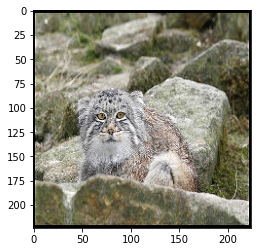

In [7]:
import matplotlib.pyplot as plt

import cv2
import numpy as np

cv_img = cv2.imread('/kaggle/input/cat-dataset/CAT_03/00000806_008.jpg')
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
image = cv2.resize(cv_img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

print(type(image))
print(image.shape)
plt.imshow(image)
plt.show()

In [8]:
!cat /kaggle/input/cat-dataset/CAT_03/00000806_008.jpg.cat

9 158 161 199 160 179 190 131 142 105 139 132 133 217 129 248 125 228 139 

In [9]:
import pandas as pd
file = '/kaggle/input/cat-dataset/CAT_03/00000806_008.jpg'
df = pd.read_csv(file+".cat", sep=" ", header=None)
df = df.drop(columns=[0, 19])
label = df.values.squeeze()

print(label.shape)
print(label)


(18,)
[158 161 199 160 179 190 131 142 105 139 132 133 217 129 248 125 228 139]


# 디렉토리 내의 파일 읽기

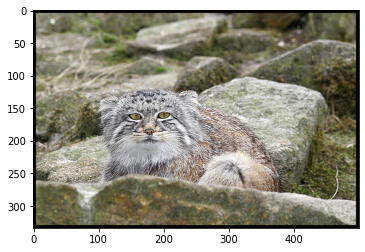

[158 161 199 160 179 190 131 142 105 139 132 133 217 129 248 125 228 139]


In [10]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd


def load_image(file_name):
    cv_img = cv2.imread(file_name)
    return cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
#     return cv2.resize(cv_img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

def load_label(file_name):
    df = pd.read_csv(file_name+".cat", sep=" ", header=None)
    df = df.drop(columns=[0, 19])
    return df.values.squeeze()
    
file = '/kaggle/input/cat-dataset/CAT_03/00000806_008.jpg'
image_in_numpy = load_image(file)
label_in_numpy = load_label(file)
plt.imshow(image_in_numpy)
plt.show()
print(label_in_numpy)

In [11]:
images = []
labels = []
for file_name in file_list:    
    images.append(load_image(file_name))
    labels.append(load_label(file_name))

# 이미지 리사이즈

In [12]:
resized_images = []
resized_labels = []
for i in range(len(images)):
    resized_images.append(cv2.resize(images[i], dsize=(224, 224), interpolation=cv2.INTER_CUBIC))

    resized_label = np.empty_like(labels[i])
    resized_label[::2] = labels[i][::2] * 224 / images[i].shape[1]  # x, 가로
    resized_label[1::2] = labels[i][1::2] * 224 / images[i].shape[0]# y, 세로
    resized_labels.append(resized_label)

# Numpy 변환

In [13]:
raw_x = np.array(resized_images, dtype=np.int)
raw_y = np.array(resized_labels, dtype=np.float)

print(raw_x.shape)
print(raw_y.shape)

(811, 224, 224, 3)
(811, 18)


# 딥러닝 학습

## 데이터 추리기

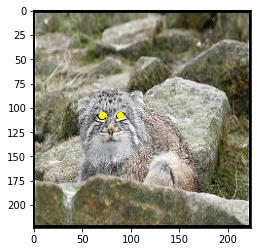

In [14]:
x = raw_x
y = raw_y[:,0:4]

target_x = x[0]
target_y = y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.show()

## Normalization

In [15]:
x = x / 255.
y = y / 255.

## 데이터 분리

In [16]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

print(train_y[:10])

(648, 224, 224, 3)
(648, 4)
(163, 224, 224, 3)
(163, 4)
[[0.38823529 0.4        0.47058824 0.43921569]
 [0.35294118 0.29019608 0.47843137 0.28627451]
 [0.52941176 0.35686275 0.63529412 0.34901961]
 [0.21960784 0.48235294 0.38823529 0.4745098 ]
 [0.41960784 0.26666667 0.57254902 0.26666667]
 [0.50588235 0.26666667 0.69803922 0.31372549]
 [0.24313725 0.46666667 0.39215686 0.35686275]
 [0.35686275 0.23921569 0.4745098  0.22745098]
 [0.34901961 0.41960784 0.48627451 0.36078431]
 [0.40392157 0.4        0.61176471 0.38431373]]


2021-12-27 07:25:59.414877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 07:25:59.508561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 07:25:59.509268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 07:25:59.510335: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8028288   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 10,287,300
Trainable params: 8,029,060
Non-trainable params: 2,258,240
_________________________________________________________________


2021-12-27 07:26:04.379870: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-12-27 07:26:07.809645: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


37/37 [==============================] - 10s 50ms/step - loss: 0.0579 - val_loss: 0.0771
Epoch 2/100
37/37 [==============================] - 1s 27ms/step - loss: 0.0334 - val_loss: 0.0232
Epoch 3/100
37/37 [==============================] - 1s 29ms/step - loss: 0.0150 - val_loss: 0.0123
Epoch 4/100
37/37 [==============================] - 1s 22ms/step - loss: 0.0094 - val_loss: 0.0079
Epoch 5/100
37/37 [==============================] - 1s 22ms/step - loss: 0.0073 - val_loss: 0.0058
Epoch 6/100
37/37 [==============================] - 1s 21ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 7/100
37/37 [==============================] - 1s 21ms/step - loss: 0.0048 - val_loss: 0.0051
Epoch 8/100
37/37 [==============================] - 1s 23ms/step - loss: 0.0038 - val_loss: 0.0043
Epoch 9/100
37/37 [==============================] - 1s 24ms/step - loss: 0.0036 - val_loss: 0.0048
Epoch 10/100
37/37 [==============================] - 1s 23ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 11/1

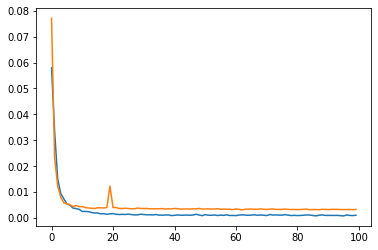

In [17]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

right_eye_model = models.Sequential()

right_eye_model.add(conv_layers)
right_eye_model.add(Flatten())
right_eye_model.add(Dense(128, activation='relu'))
right_eye_model.add(BatchNormalization())
right_eye_model.add(Dense(4, activation="sigmoid"))

right_eye_model.summary()

right_eye_model.compile(optimizer='Adam', loss='mse')


history = right_eye_model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


## 결과 보기

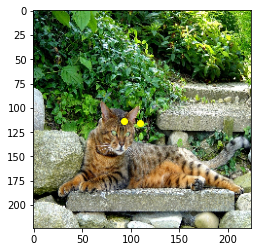

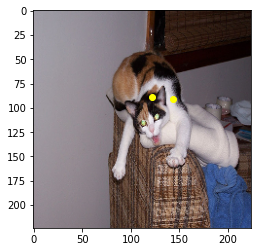

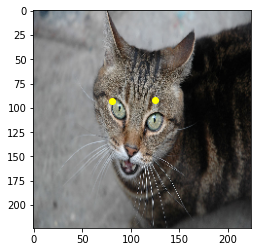

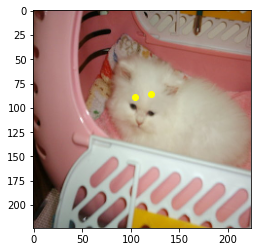

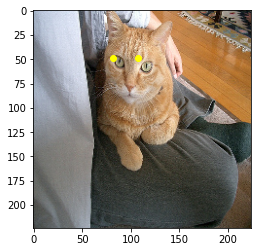

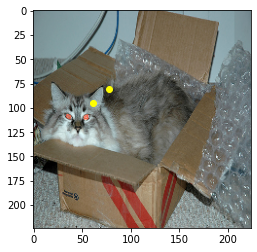

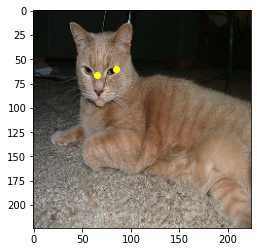

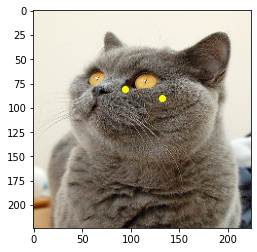

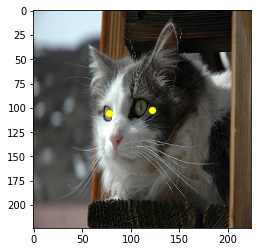

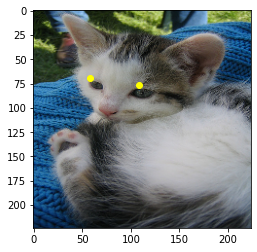

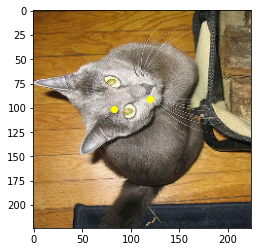

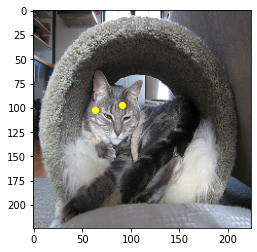

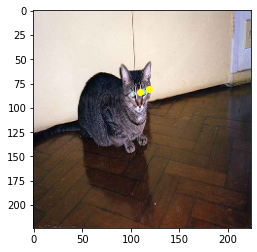

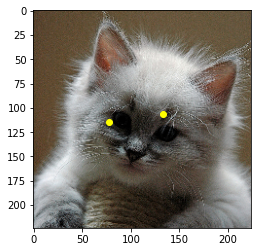

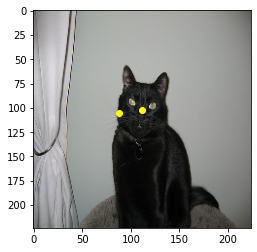

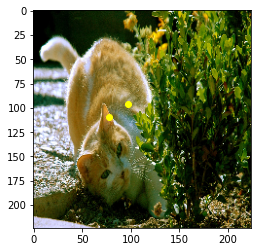

In [18]:
predicted = right_eye_model.predict(test_x[:16])

for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(int(predicted[i][0]*255), int(predicted[i][1]*255), color='yellow')
  plt.scatter(int(predicted[i][2]*255), int(predicted[i][3]*255), color='yellow')
  plt.show()